# Music Genre Classification

### Model Training

We do model training using DNN and check the accuracy.


### Importing required packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
from torch.optim import lr_scheduler
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### Importing data

In [3]:
df = pd.read_csv('data/extracted_features.csv')

### Show Top 5 records

In [4]:
df.head()

,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_mean,amplitude_envelope_median,amplitude_envelope_std,amplitude_envelope_skewness,amplitude_envelope_kurtosis,tempo,rmse_min,rmse_max,...,delta2_11_skewness,delta2_11_kurtosis,delta2_12_min,delta2_12_max,delta2_12_mean,delta2_12_median,delta2_12_std,delta2_12_skewness,delta2_12_kurtosis,label
0,0.053619,0.885376,0.327602,0.311066,0.140254,0.489576,-0.128055,123.046875,0.019510,0.364873,...,0.098577,0.191154,-3.352592,3.110977,-0.006362,-0.050244,0.862269,0.129130,0.361510,blues
1,0.006958,0.683807,0.249066,0.235840,0.140119,0.398476,-0.348839,107.666016,0.003667,0.295631,...,-0.222169,0.044927,-2.307786,2.344125,0.000065,-0.007235,0.797817,0.055032,-0.170996,blues
2,0.057312,0.834778,0.444890,0.443542,0.151819,0.122503,-0.484946,161.499023,0.020144,0.356653,...,0.061918,1.110443,-3.537014,3.709806,0.000017,0.029372,0.945367,-0.125581,0.691212,blues
3,0.022308,0.845886,0.306623,0.281799,0.171395,0.489788,-0.477087,172.265625,0.008337,0.402478,...,-0.090198,0.890176,-2.714332,4.469221,-0.001656,-0.007886,0.862563,0.316026,1.078316,blues
4,0.016296,0.859589,0.282141,0.246765,0.167069,0.794927,0.084406,135.999178,0.006501,0.331345,...,-0.045866,1.249358,-3.021901,4.375982,-0.006027,-0.021120,1.033295,0.141954,0.285965,blues


### Converting categorical label to numerical values

In [5]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [6]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f'Mapping = {mapping}')

Mapping = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


In [7]:
df.head()

,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_mean,amplitude_envelope_median,amplitude_envelope_std,amplitude_envelope_skewness,amplitude_envelope_kurtosis,tempo,rmse_min,rmse_max,...,delta2_11_skewness,delta2_11_kurtosis,delta2_12_min,delta2_12_max,delta2_12_mean,delta2_12_median,delta2_12_std,delta2_12_skewness,delta2_12_kurtosis,label
0,0.053619,0.885376,0.327602,0.311066,0.140254,0.489576,-0.128055,123.046875,0.019510,0.364873,...,0.098577,0.191154,-3.352592,3.110977,-0.006362,-0.050244,0.862269,0.129130,0.361510,0
1,0.006958,0.683807,0.249066,0.235840,0.140119,0.398476,-0.348839,107.666016,0.003667,0.295631,...,-0.222169,0.044927,-2.307786,2.344125,0.000065,-0.007235,0.797817,0.055032,-0.170996,0
2,0.057312,0.834778,0.444890,0.443542,0.151819,0.122503,-0.484946,161.499023,0.020144,0.356653,...,0.061918,1.110443,-3.537014,3.709806,0.000017,0.029372,0.945367,-0.125581,0.691212,0
3,0.022308,0.845886,0.306623,0.281799,0.171395,0.489788,-0.477087,172.265625,0.008337,0.402478,...,-0.090198,0.890176,-2.714332,4.469221,-0.001656,-0.007886,0.862563,0.316026,1.078316,0
4,0.016296,0.859589,0.282141,0.246765,0.167069,0.794927,0.084406,135.999178,0.006501,0.331345,...,-0.045866,1.249358,-3.021901,4.375982,-0.006027,-0.021120,1.033295,0.141954,0.285965,0


### Creating feature and target matrix

In [8]:
X_df = df.drop(columns = ['label'])
y_df = df['label']

In [10]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split( X_df, y_df, test_size=0.1, random_state=42, stratify=y_df)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_valid, y_train_valid, test_size=0.1, random_state=42, stratify=y_train_valid)

### Standardization

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

In [64]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_valid = y_valid.to_numpy()

In [15]:
print(f'Shape of X_train = {X_train.shape}')
print(f'Shape of y_train = {y_train.shape}')
print(f'Shape of X_test = {X_test.shape}')
print(f'Shape of y_test = {y_test.shape}')
print(f'Shape of X_valid = {X_valid.shape}')
print(f'Shape of y_valid = {y_valid.shape}')

Shape of X_train = (810, 491)
Shape of y_train = (810,)
Shape of X_test = (100, 491)
Shape of y_test = (100,)
Shape of X_valid = (90, 491)
Shape of y_valid = (90,)


#### Creating train and valid dataloader

In [65]:
train_data = torch.utils.data.TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).type(torch.int64))
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size = 16,
                                           shuffle = True)

valid_data = torch.utils.data.TensorDataset(torch.tensor(X_valid).float(), torch.tensor(y_valid).type(torch.int64))
valid_loader = torch.utils.data.DataLoader(dataset=valid_data,
                                           batch_size = 16,
                                           shuffle = True)

## Models

### Training

In [21]:
def training(model, model_name, loss_fn, optimizer, scheduler, train_data_loader, valid_data_loader, num_epochs = 25, patience = 5):
    min_loss = np.inf
    count = 0
    history = []
    for epoch in tqdm(range(num_epochs)):
        model.train()
        train_loss = 0.0
        train_acc = 0.0 
        
        valid_loss = 0.0
        valid_acc = 0.0
        for _, (inputs, labels) in enumerate(train_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            y_preds = model(inputs)
            loss = loss_fn(y_preds, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*len(inputs)
            correct_counts = (torch.argmax(y_preds.data, 1) == labels).float().sum().item()
            train_acc += correct_counts
        
        with torch.no_grad():
            model.eval()
            for _, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                y_preds = model(inputs)
                loss = loss_fn(y_preds, labels)
                valid_loss += loss.item()*len(inputs)
                correct_counts = (torch.argmax(y_preds.data, 1) == labels).float().sum().item()
                valid_acc += correct_counts
        
        train_loss = train_loss/len(train_data_loader.dataset)
        train_acc = train_acc/len(train_data_loader.dataset)
        
        valid_loss = valid_loss/len(valid_data_loader.dataset)
        valid_acc = valid_acc/len(valid_data_loader.dataset)
        
        history.append([train_acc, train_loss, valid_acc, valid_loss]) 
        print(f'Epoch No. {epoch+1}')
        print(f'Training Accuracy = {train_acc:.4f}, Loss = {train_loss:.4f}')
        print(f'Validation Accuracy = {valid_acc:.4f}, Loss = {valid_loss:.4f}')
        torch.save(model.state_dict(), model_name + '_last_epoch.pt')
        
        scheduler.step(valid_loss)
        
        if (valid_loss < min_loss):
            count = 0 
            min_loss = valid_loss 
            torch.save(model.state_dict(), model_name + '_best_model.pt')
        
        else:
            count += 1
            if (count >= patience):
                print(f'Early stop at Epoch Number. {epoch + 1}')
                break 
        
    return model, history

### Accuracy for test data

In [71]:
test_data = torch.utils.data.TensorDataset(torch.tensor(X_test).float(), torch.tensor(y_test).type(torch.int64))
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                           batch_size = 16,
                                           shuffle = True)

In [23]:
def get_accuracy(trained_model, loss_fn, test_data_loader):
    test_loss = 0.0
    test_acc = 0.0
    with torch.no_grad():
        trained_model.eval()
        for _, (inputs, labels) in enumerate(test_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            y_preds = trained_model(inputs)
            loss = loss_fn(y_preds, labels)
            test_loss += loss.item()*len(inputs)
            correct_counts = (torch.argmax(y_preds.data, 1) == labels).float().sum().item()
            test_acc += correct_counts
    test_loss = test_loss/len(test_data_loader.dataset)
    test_acc = test_acc/len(test_data_loader.dataset)
    print(f'Loss for test set = {test_loss:.4f}')
    print(f'Accuracy for test set = {test_acc:.4f}')
    return test_loss, test_acc

In [24]:
def post_training(trained_model, loss_fn, test_loader, history, model_name):
    test_loss, test_acc = get_accuracy(trained_model, loss_fn, test_loader)
    history_np = np.array(history)
    fig, axes = plt.subplots(1, 2, figsize = (12, 4))
    epochs_list = np.arange(1, len(history_np)+1)
    axes[0].plot(epochs_list, history_np[:, 0], label = "Training Accuracy", marker = '.')
    axes[0].plot(epochs_list, history_np[:, 2], label = "Validation Accuracy", marker = '.')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    axes[1].plot(epochs_list, history_np[:, 1], label = "Training Loss", marker = '.')
    axes[1].plot(epochs_list, history_np[:, 3], label = "Validation Loss", marker = '.')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    fig.suptitle(f'Training for {model_name}')
    plt.show()
    return test_loss, test_acc

### DNN

In [75]:
model_name = 'DNN'
model_1 = nn.Sequential(
    nn.Linear(491, 512),
    nn.ReLU(),
    nn.Dropout(0.7),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.7),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Dropout(0.7),
    nn.Linear(128, 10)
)
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr = learning_rate)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
model_1.to(device)
trained_model1 , history_model1 = training(model_1, 'DNN', loss_fn, optimizer, scheduler, train_loader, valid_loader, 50, 10)

  2%|▏         | 1/50 [00:00<00:16,  2.91it/s]

Epoch No. 1
Training Accuracy = 0.1457, Loss = 2.2572
Validation Accuracy = 0.3667, Loss = 1.9753


  4%|▍         | 2/50 [00:00<00:15,  3.13it/s]

Epoch No. 2
Training Accuracy = 0.2630, Loss = 1.9616
Validation Accuracy = 0.4333, Loss = 1.6013


  6%|▌         | 3/50 [00:00<00:14,  3.25it/s]

Epoch No. 3
Training Accuracy = 0.3556, Loss = 1.7917
Validation Accuracy = 0.4778, Loss = 1.4297


  8%|▊         | 4/50 [00:01<00:13,  3.35it/s]

Epoch No. 4
Training Accuracy = 0.4062, Loss = 1.6431
Validation Accuracy = 0.5556, Loss = 1.3142


 10%|█         | 5/50 [00:01<00:13,  3.32it/s]

Epoch No. 5
Training Accuracy = 0.4259, Loss = 1.5086
Validation Accuracy = 0.6111, Loss = 1.2087


 12%|█▏        | 6/50 [00:01<00:13,  3.35it/s]

Epoch No. 6
Training Accuracy = 0.4926, Loss = 1.3850
Validation Accuracy = 0.6000, Loss = 1.1407


 14%|█▍        | 7/50 [00:02<00:12,  3.37it/s]

Epoch No. 7
Training Accuracy = 0.5333, Loss = 1.2384
Validation Accuracy = 0.7111, Loss = 1.0042


 16%|█▌        | 8/50 [00:02<00:12,  3.40it/s]

Epoch No. 8
Training Accuracy = 0.5654, Loss = 1.1577
Validation Accuracy = 0.7556, Loss = 0.9166


 18%|█▊        | 9/50 [00:02<00:12,  3.40it/s]

Epoch No. 9
Training Accuracy = 0.5852, Loss = 1.1246
Validation Accuracy = 0.7000, Loss = 0.8615


 20%|██        | 10/50 [00:03<00:11,  3.37it/s]

Epoch No. 10
Training Accuracy = 0.6037, Loss = 1.1081
Validation Accuracy = 0.7444, Loss = 0.8581


 22%|██▏       | 11/50 [00:03<00:11,  3.34it/s]

Epoch No. 11
Training Accuracy = 0.6667, Loss = 0.9837
Validation Accuracy = 0.7222, Loss = 0.8118


 24%|██▍       | 12/50 [00:03<00:11,  3.28it/s]

Epoch No. 12
Training Accuracy = 0.7198, Loss = 0.8501
Validation Accuracy = 0.7333, Loss = 0.7934


 26%|██▌       | 13/50 [00:03<00:11,  3.34it/s]

Epoch No. 13
Training Accuracy = 0.7148, Loss = 0.8080
Validation Accuracy = 0.7333, Loss = 0.8294


 28%|██▊       | 14/50 [00:04<00:12,  2.96it/s]

Epoch No. 14
Training Accuracy = 0.7185, Loss = 0.8114
Validation Accuracy = 0.7111, Loss = 0.7629


 30%|███       | 15/50 [00:04<00:11,  3.07it/s]

Epoch No. 15
Training Accuracy = 0.7420, Loss = 0.7722
Validation Accuracy = 0.7556, Loss = 0.7682


 32%|███▏      | 16/50 [00:04<00:10,  3.20it/s]

Epoch No. 16
Training Accuracy = 0.7506, Loss = 0.7731
Validation Accuracy = 0.7556, Loss = 0.7215


 34%|███▍      | 17/50 [00:05<00:10,  3.28it/s]

Epoch No. 17
Training Accuracy = 0.7864, Loss = 0.6935
Validation Accuracy = 0.7889, Loss = 0.7253


 36%|███▌      | 18/50 [00:05<00:09,  3.33it/s]

Epoch No. 18
Training Accuracy = 0.7840, Loss = 0.7231
Validation Accuracy = 0.7111, Loss = 0.8035


 38%|███▊      | 19/50 [00:05<00:09,  3.40it/s]

Epoch No. 19
Training Accuracy = 0.7728, Loss = 0.6483
Validation Accuracy = 0.7556, Loss = 0.7714


 40%|████      | 20/50 [00:06<00:08,  3.42it/s]

Epoch No. 20
Training Accuracy = 0.7568, Loss = 0.6860
Validation Accuracy = 0.7556, Loss = 0.6792


 42%|████▏     | 21/50 [00:06<00:08,  3.41it/s]

Epoch No. 21
Training Accuracy = 0.7914, Loss = 0.6336
Validation Accuracy = 0.7556, Loss = 0.6753


 44%|████▍     | 22/50 [00:06<00:08,  3.43it/s]

Epoch No. 22
Training Accuracy = 0.8148, Loss = 0.5606
Validation Accuracy = 0.7667, Loss = 0.7077


 46%|████▌     | 23/50 [00:06<00:07,  3.45it/s]

Epoch No. 23
Training Accuracy = 0.7864, Loss = 0.6656
Validation Accuracy = 0.7444, Loss = 0.7409


 48%|████▊     | 24/50 [00:07<00:07,  3.46it/s]

Epoch No. 24
Training Accuracy = 0.8148, Loss = 0.6128
Validation Accuracy = 0.7333, Loss = 0.7923


 50%|█████     | 25/50 [00:07<00:07,  3.48it/s]

Epoch No. 25
Training Accuracy = 0.7914, Loss = 0.6307
Validation Accuracy = 0.7667, Loss = 0.7145


 52%|█████▏    | 26/50 [00:07<00:06,  3.45it/s]

Epoch No. 26
Training Accuracy = 0.8148, Loss = 0.5635
Validation Accuracy = 0.7222, Loss = 0.7197


 54%|█████▍    | 27/50 [00:08<00:06,  3.46it/s]

Epoch No. 27
Training Accuracy = 0.8370, Loss = 0.5091
Validation Accuracy = 0.7778, Loss = 0.7245


 56%|█████▌    | 28/50 [00:08<00:06,  3.51it/s]

Epoch No. 28
Training Accuracy = 0.8543, Loss = 0.5194
Validation Accuracy = 0.7667, Loss = 0.7488


 58%|█████▊    | 29/50 [00:08<00:06,  3.46it/s]

Epoch No. 29
Training Accuracy = 0.8605, Loss = 0.4331
Validation Accuracy = 0.7778, Loss = 0.7538


 60%|██████    | 30/50 [00:08<00:05,  3.36it/s]

Epoch No. 30
Training Accuracy = 0.8469, Loss = 0.4264
Validation Accuracy = 0.7444, Loss = 0.7628


 60%|██████    | 30/50 [00:09<00:06,  3.24it/s]

Epoch No. 31
Training Accuracy = 0.8531, Loss = 0.4972
Validation Accuracy = 0.7667, Loss = 0.8291
Early stop at Epoch Number. 31


Loss for test set = 0.6681
Accuracy for test set = 0.8000


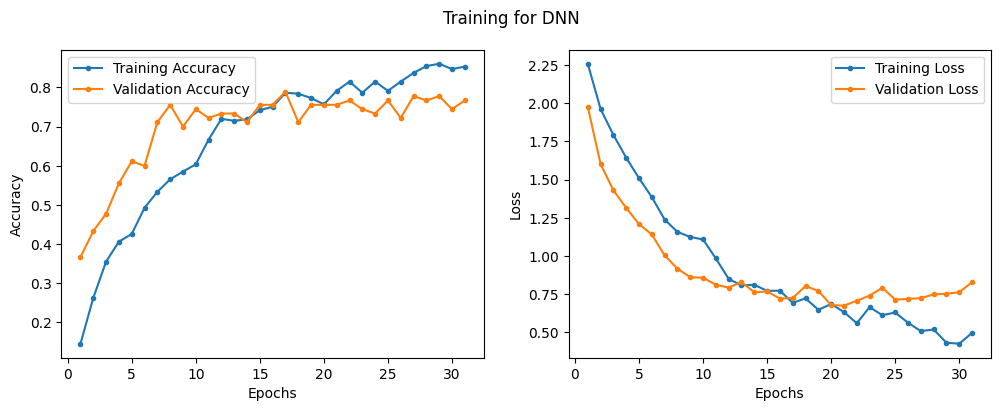

In [76]:
test_loss_1, test_acc_1 = post_training(trained_model1, loss_fn, test_loader, history_model1, 'DNN')